# Python Homework 1

<b> Instructions:</b> This Python Homework is due on <b> Tuesday, April 12th, at 11:59 p.m.</b> You have to submit your version of this Jupyter Notebook via Gradescope!

In this homework you are supposed to use the random number generater random.random_sample from the numpy package to generate random numbers with three different distributions. 

Recall from the lecture that if $F:\mathbb{R}\rightarrow [0,1]$ is a distribution function with generalized inverse $F^{-1}:[0,1]\rightarrow \mathbb{R}$ and $U$ is a uniform random variable, then $F^{-1}(U)$ is a random variable with distribution function $F$.

Using the function random.random_sample from numpy package write three functions: 
* exponentialRV(seed, mean,n) that returns for given seed a bunch of n random variables from an exponential distribution with the provided mean. Derive the generalized inverse distribution function analytically for your simulation.
* binomial(seed, p,m,n) that returns for given seed a bunch of n Binomial distributed random numbers with the provided success probability p and the number of trial equal to m. You have to numerically calculate the inverse distribution function.
* funnyDiceRV(seed,n) that returns for given seed a bunch of n random number which describe a biased die with distribution $\mathbb{P}(\{1\})=\mathbb{P}(\{2\})=1/6$,$\mathbb{P}(\{3\})=\mathbb{P}(\{4\})=1/4$ and $\mathbb{P}(\{5\})=\mathbb{P}(\{6\})=1/12$.

Name: Bochen Wang Perm:8344863

In [57]:
import numpy as np
import math
import matplotlib.pyplot as plt

Here should come your code for the three functions:

In [58]:
def exponentialRV(seed, mean,n):
    
    ##Here write your own code
    expontialSample = list(range(n))
    np.random.seed(seed)
    for i in range (0,n):
        m = np.random.random_sample()
        expontialSample[i] = 0 - (np.log(1 - m)) * mean 
    return expontialSample

In [59]:
def binpmf(n, p ,k):
    res = (math.factorial(n) * pow(p, k) * pow(1-p, n - k))/(math.factorial(k) * math.factorial(n-k))
    return res
def binomial(seed, p,m,n):
    np.random.seed(seed)
    binomialSample = []
    for i in range(n):
        rand = np.random.random_sample()
        cdf = 0 #generate the base for cdf to add on
        k = -1 #for future use if find rand match we append the k value; -1 is for the 0 value
        while(rand > cdf):
            k = k+1
            cdf += binpmf(m,p,k)            
        binomialSample.append(k)
    return binomialSample

In [60]:
def funnyDiceRV(seed, n):
    
    ##Here write your own code
    np.random.seed(seed)
    funnyDiceSample = list(range(n))
    for i in range(n):
        m = np.random.random_sample()
        if(m <= 1/6):
            funnyDiceSample[i] = 1
        elif(m <= 1/3):
            funnyDiceSample[i] = 2
        elif(m <= 7/12):
            funnyDiceSample[i] = 3
        elif(m <= 10/12):
            funnyDiceSample[i] = 4
        elif(m <= 11/12):
            funnyDiceSample[i] = 5
        elif(m <= 1):
            funnyDiceSample[i] = 6
        
    return funnyDiceSample

In [61]:
print(exponentialRV(105, 3,5))# You should test all three functions 
print(binomial(105, 0.7,20,5))
print(funnyDiceRV(105, 5))

[0.2623650861900565, 1.2171737414601362, 5.884564774747791, 0.3350978072529029, 2.301285780939671]
[11, 13, 16, 11, 14]
[1, 3, 5, 1, 3]


You should use the following routine to plot a histogram of the distribution of all three simulated random variables

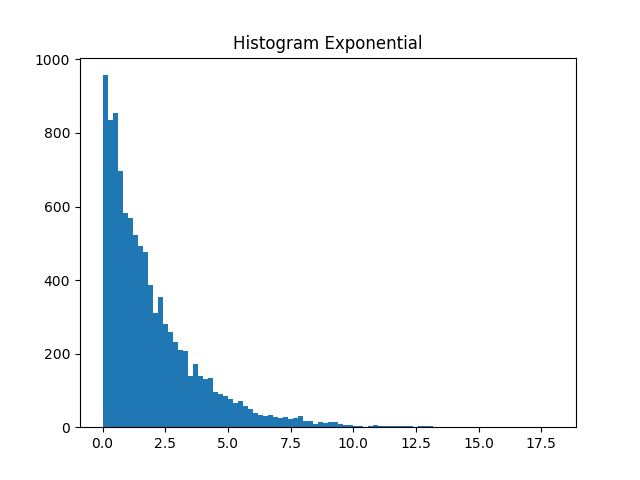

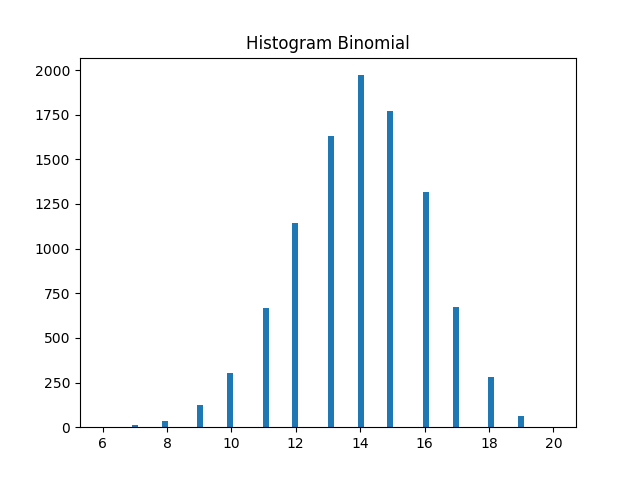

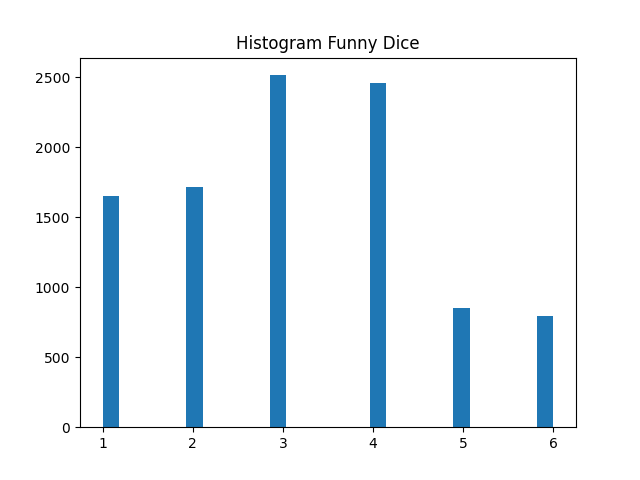

In [62]:
numberSimulations=10000
exponentialSamples=exponentialRV(1, 2,numberSimulations)
binomialSamples=binomial(1, 0.7,20,numberSimulations)
funnyDiceSamples=funnyDiceRV(1, numberSimulations)

#np.histogram(exponentialSamples)
plt.hist(exponentialSamples, bins='auto')
plt.title("Histogram Exponential")
plt.show()
plt.hist(binomialSamples, bins='auto')
plt.title("Histogram Binomial")
plt.show()
plt.hist(funnyDiceSamples, bins='auto')
plt.title("Histogram Funny Dice")
plt.show()

For the exponential random variable, you should then test the empirical expectation and variance of the random variables you generated. Assume you have generated random variables $X_1,X_2,X_3,\dots,X_n$ calculate the empirical mean 
\begin{equation}
\hat{\text{ }\mu} =\frac{\sum^n_{i=1} X_i}{n}
\end{equation}
and the empirical variance 
\begin{equation}
\hat{\text{ }\sigma} = \frac{\sum^n_{i=1}(X_i - \hat{\mu})^2}{n}
\end{equation}
Use 10000 simulations. Is the result of your calculation in line with what you expect? Why?

In [63]:
#Here you add the few lines of code for your calculations
#For the mean we have the following code
numberSimulations=10000
meanarr=exponentialRV(1, 2,numberSimulations)
print(np.mean(meanarr))
#For the variance we have
print(np.var(meanarr))

1.9770938809848277
3.848581029324636


Explanation: For the mean we choose is 2. The calculation is 1.977.
We can see that the empirical mean is close to 2, which means that law of large number holds that 1/lamda is the mean
For the variance by the property of exponential distribution we know that it is 1/(lamda)^2 which here is 4.
The calculation is 3.8 which is close to the number we had so that this means this is true.